In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

import numpy as np
from scipy import integrate
from numba import jit
from tqdm import tqdm
import time

from BSSolver import B_field_Solver
from WireShape import Wire
from PathSolver import Particle_Path_Solver

# Create Coils in Tokamak

### Toroidal Coils

In [3]:
myToroidal = Wire()

#Toroidal of major radius R1 and minor radius R2
R1_Toroidal = 1
R2_Toroidal = 0.5
N_Toroidal = 20
step_Toroidal = 0.001

myToroidal.Create_Toroidal_Coil(R1_Toroidal, R2_Toroidal, N_Toroidal, step_Toroidal)
myToroidal.Set_Current(1)

### Solenoid Coils

In [4]:
mySolenoid = Wire()

R_Solenoid = 0.375
N_Solenoid = 10
l_Solenoid = 1
step_Solenoid = 0.1

mySolenoid.Create_Solenoid(R_Solenoid, N_Solenoid, l_Solenoid, step_Solenoid)
mySolenoid.Transform_Shift(0, 0, -0.5)
mySolenoid.Set_Current(1)

### Plot Coils in Tokamak

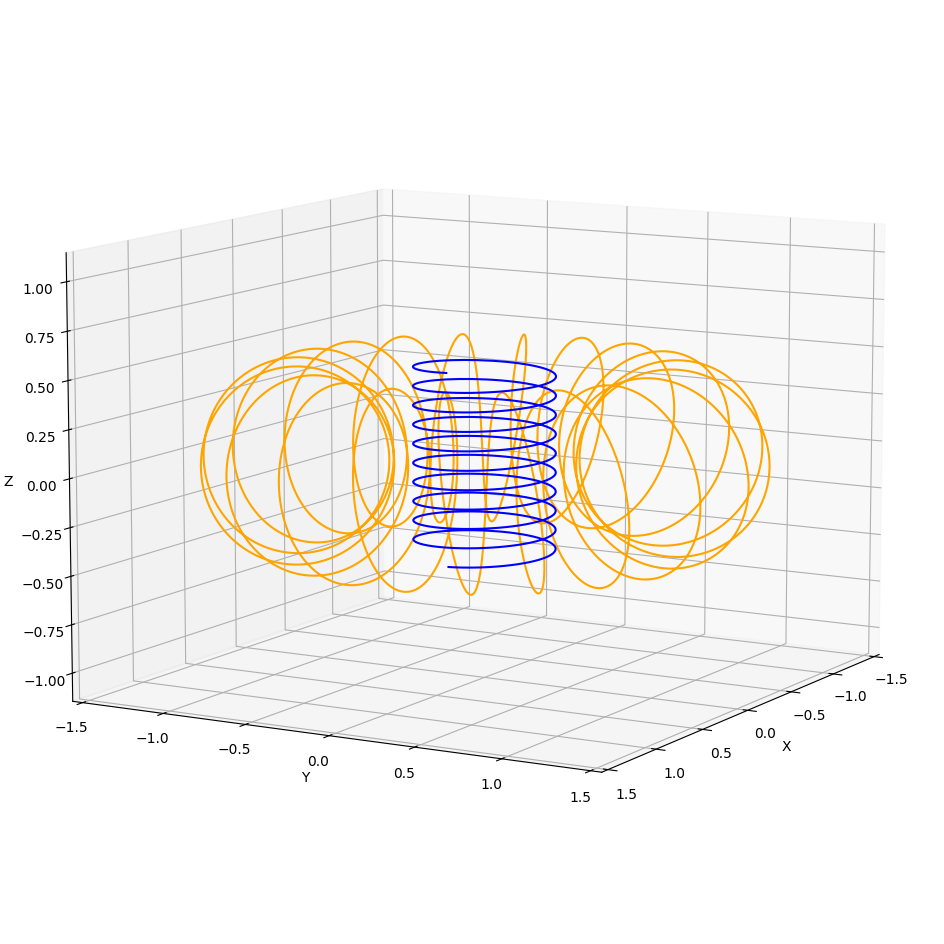

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10, azim=30)

ax.plot3D(*myToroidal.coordz, color='orange')
ax.plot3D(*mySolenoid.coordz, color='blue')

# Setting the axes properties
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('X')

ax.set_ylim(-1.5,1.5)
ax.set_ylabel('Y')

ax.set_zlim(-1.1,1.1)
ax.set_zlabel('Z')

plt.show()

# B-field from Coils

### Data Points to compute field 

In [20]:
def discretize_cube(x_start, x_end, y_start, y_end, z_start, z_end, step):
    """ Discretizes the interior of a rectangular cuboid into a grid of points.
        
    Parameters
    ----------
    x_start : float
        The starting x-coordinate of the cube.
    x_end : float
        The ending x-coordinate of the cube. 
    
    Returns
    -------
    a : np.ndarray
        A list of tuples, each representing the coordinates of a point in the grid.
    """

    x = np.arange(x_start, x_end, step)
    y = np.arange(y_start, y_end, step)
    z = np.arange(z_start, z_end, step)
    
    xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')
    
    # Combine the coordinates into a single array of 3-tuples
    coordinates = np.vstack([xv.ravel(), yv.ravel(), zv.ravel()]).T
    
    return coordinates

# Rectangular cuboid containing the Tokamak
data_coordinates = discretize_cube(-1.5, 1.5, -1.5, 1.5, -0.5, 0.5, 0.01)

### B-field of Toroidal Coils

In [21]:
B_field_Solver_Toroidal = B_field_Solver(myToroidal)
B_field_Toroidal = B_field_Solver_Toroidal.Solve_B_field_for_data_points(data_coordinates)

KeyboardInterrupt: 

### B-field of Solenoid Coils

In [ ]:
B_field_Solver_Solenoid = B_field_Solver(mySolenoid)
B_field_Solenoid = B_field_Solver_Solenoid.Solve_B_field_for_data_points(data_coordinates)

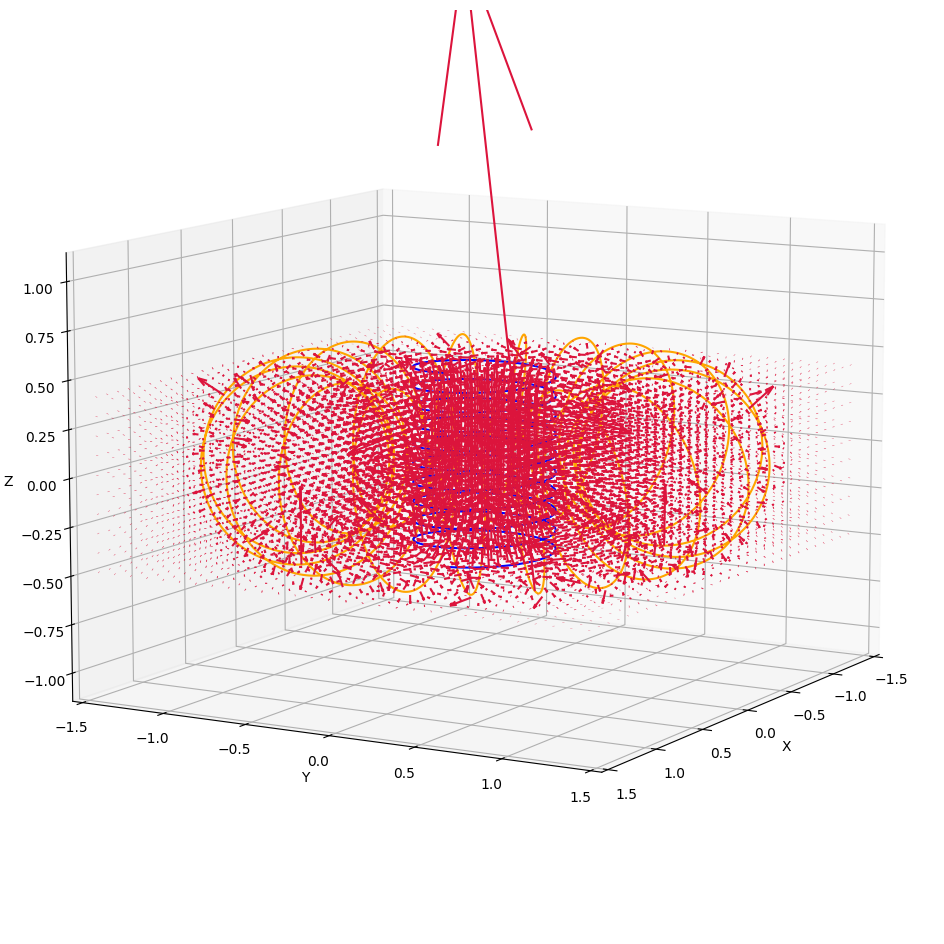

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10, azim=30)

#ax.plot3D(*data_coordinates.T, '.', color='red')
ax.quiver3D(*data_coordinates.T,*np.transpose(B_field_Solenoid+B_field_Toroidal)/1000, color='crimson', normalize=False)
ax.plot3D(*myToroidal.coordz, color='orange')
ax.plot3D(*mySolenoid.coordz, color='blue')

# Setting the axes properties
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('X')

ax.set_ylim(-1.5,1.5)
ax.set_ylabel('Y')

ax.set_zlim(-1.1,1.1)
ax.set_zlabel('Z')

plt.show()